#1. 숫자 필기 데이터 소개

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1797개의 이미지 데이터 로드

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(digits.target[0])

0


In [ ]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


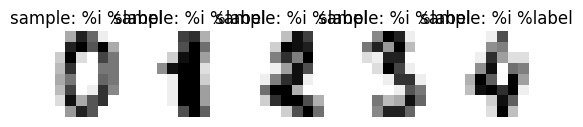

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(2, 5, index+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i %label')

In [ ]:
for i in range(5):
  print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [ ]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
X = digits.data # 이미지(특성행렬)
Y = digits.target # 각 이미지에 대한 레이블

#2. 다중 퍼셉트론 분류기 만들기

In [ ]:
import torch
import torch.nn as nn
from torch import optim

In [ ]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [ ]:
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

In [ ]:
loss_fn = nn.CrossEntropyLoss() # 이 비용함수는 소프트맥스 함수를 포함하고 있음

In [ ]:
optimizer = optim.Adam(model.parameters())

In [ ]:
losses = []

In [ ]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forward 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 ==0:
    print('Epoch{:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
    ))
    losses.append(loss.item())

Epoch   0/100 Cost: 3.244406
Epoch  10/100 Cost: 2.228347
Epoch  20/100 Cost: 1.966506
Epoch  30/100 Cost: 1.671783
Epoch  40/100 Cost: 1.339011
Epoch  50/100 Cost: 1.009073
Epoch  60/100 Cost: 0.745436
Epoch  70/100 Cost: 0.559800
Epoch  80/100 Cost: 0.430789
Epoch  90/100 Cost: 0.340443


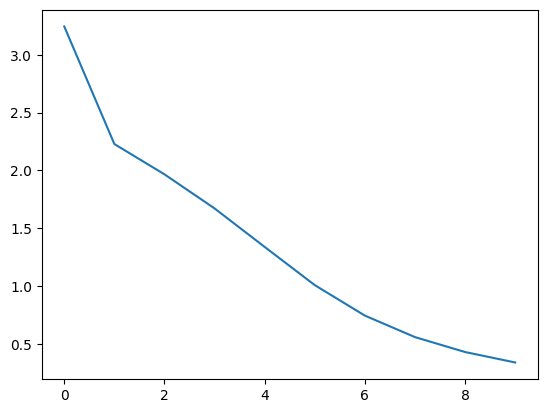

In [ ]:
plt.plot(losses)